In [ ]:
import pandas as pd
path = '../data/R911R912 _ARO1.xlsx'

xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)
df = pd.read_excel(path,sheet_name=sheets[-2])
for i in df.columns:
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [7]:
a = df.dropna(axis=1,how='all').set_index('Unnamed: 1')
a.index.name = 'time'
a.index = pd.to_datetime(a.index)
a.head()

,ARO1-DCS-FIC_91103_2,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98102_1,ARO1-DCS-FIC_98102_1.RESULT,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98302_1.RESULT,ARO1-DCS-FIC_98401_1,ARO1-DCS-FIC_98401_1.RESULT,ARO1-DCS-FIC_98403_1,...,ARO1-DCS-TI98101,ARO1-DCS-TI98301,ARO1-DCS-TI98401,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS
time,,,,,,,,,,,,,,,,,,,,,
2013-07-20 00:00:00,638.648344,638.326498,645.390457,12.753275,12.620982,224.998505,226.569753,233.111313,234.925810,10.627063,...,172.246111,174.206662,175.822041,2.540602,2.542738,NaN,NaN,NaN,NaN,NaN
2013-07-20 01:00:00,651.541750,653.593980,634.264966,12.753275,12.587158,224.998505,226.244344,233.111313,234.872984,10.627063,...,172.597339,174.262855,175.847181,2.513337,2.541914,NaN,NaN,NaN,NaN,NaN
2013-07-20 02:00:00,648.830611,647.641213,657.156365,12.753275,12.607229,224.998505,226.424603,233.111313,234.950889,10.627063,...,172.969119,174.365563,175.872321,2.502503,2.557038,NaN,NaN,NaN,NaN,NaN
2013-07-20 03:00:00,622.011983,624.454044,654.174919,12.753275,12.578797,224.998505,226.657531,233.111313,235.025767,10.627063,...,173.289535,174.401102,175.897461,2.495342,2.545303,NaN,NaN,NaN,NaN,NaN
2013-07-20 04:00:00,671.924030,668.433262,659.249929,12.753275,12.576618,224.998505,226.442403,233.111313,234.928731,10.627063,...,173.193791,174.500210,175.900522,2.537570,2.538941,NaN,NaN,NaN,NaN,NaN


In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(a)
missing_values.head(20)

Your selected dataframe has 58 columns.
There are 58 columns that have missing values.


,Missing Values,% of Total Values
ARO1-LIMS-S704-TS,62517,87.5
ARO1-LIMS-S704-WATER,62517,87.5
ARO1-LIMS-s704-744-C10+,62517,87.5
ARO1-LIMS-s704-744-C9,62517,87.5
ARO1-LIMS-S704-BR_INDEX,62517,87.5
ARO1-DCS-TI91103,94,0.1
ARO1-DCS-PDI98401,94,0.1
ARO1-DCS-PDI98401A,94,0.1
ARO1-DCS-PDI98301,94,0.1
ARO1-DCS-PDI98301A,94,0.1


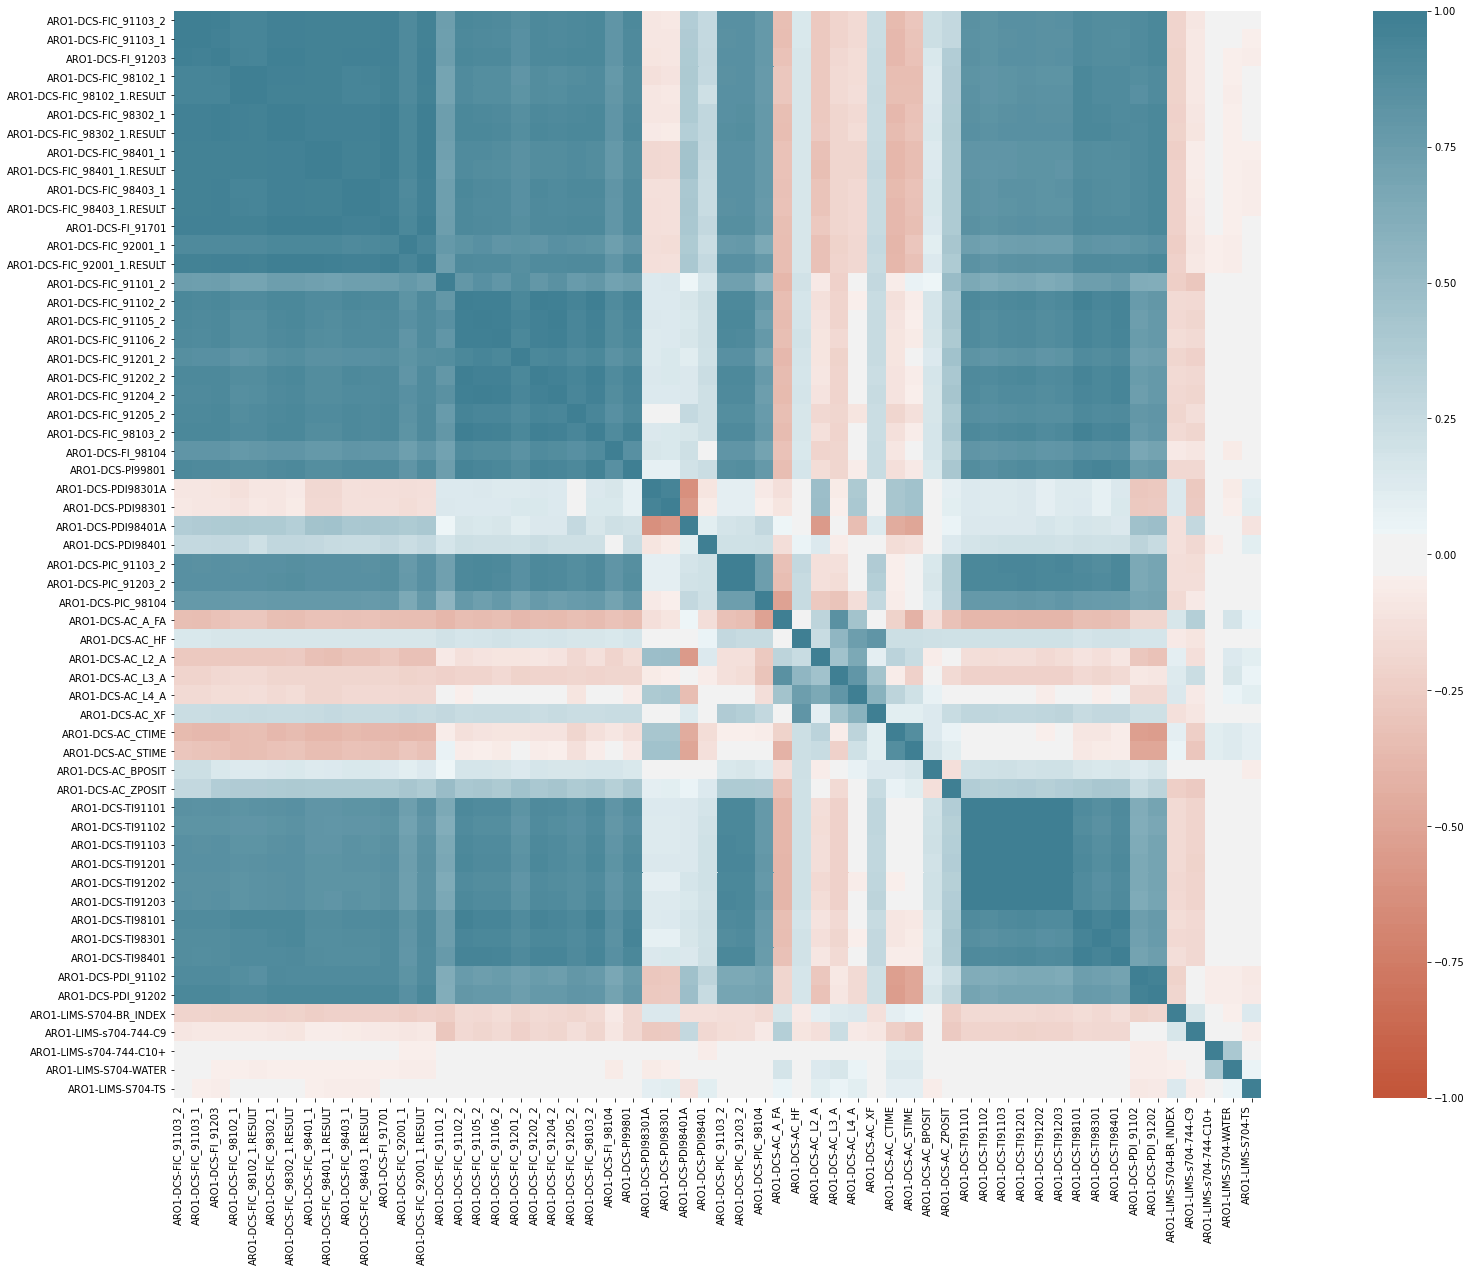

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))

ax = sns.heatmap(
    a.sample(9999).corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<AxesSubplot:ylabel='Density'>

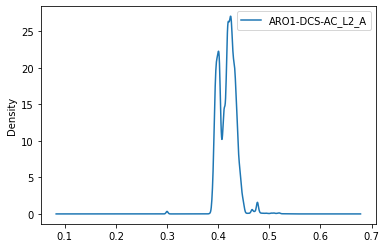

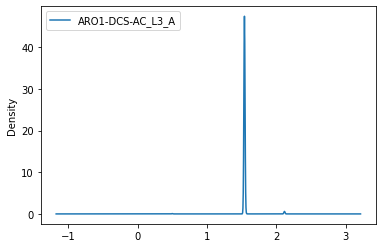

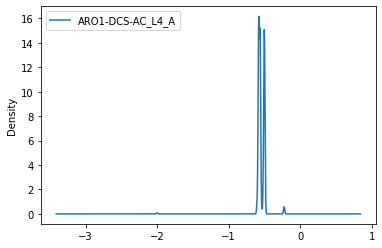

In [10]:
L2 = a.columns[a.columns.str.contains('L2')]
L3 = a.columns[a.columns.str.contains('L3')]
L4 = a.columns[a.columns.str.contains('L4')]
a[L2[0]] = pd.to_numeric(a[L2].values.reshape(-1),errors='coerce') 
a[L3[0]] = pd.to_numeric(a[L3].values.reshape(-1),errors='coerce') 
a[L4[0]] = pd.to_numeric(a[L4].values.reshape(-1),errors='coerce') 
a[L2].plot(kind='kde')
a[L3].plot(kind='kde')
a[L4].plot(kind='kde')

In [11]:
for L in [L2,L3,L4]:
    display(a.corr().abs()[L].sort_values(by=L[0],ascending=False).head(10))

,ARO1-DCS-AC_L2_A
ARO1-DCS-AC_L2_A,1.000000
ARO1-DCS-AC_L4_A,0.665502
ARO1-DCS-PDI98401A,0.548747
ARO1-DCS-PDI98301,0.483289
ARO1-DCS-AC_L3_A,0.478857
ARO1-DCS-PDI98301A,0.477360
ARO1-DCS-AC_A_FA,0.330143
ARO1-DCS-FIC_98401_1.RESULT,0.324946
ARO1-DCS-FIC_92001_1.RESULT,0.318782
ARO1-DCS-FIC_92001_1,0.318225


,ARO1-DCS-AC_L3_A
ARO1-DCS-AC_L3_A,1.000000
ARO1-DCS-AC_A_FA,0.832640
ARO1-DCS-AC_L4_A,0.813452
ARO1-DCS-AC_HF,0.556960
ARO1-DCS-AC_L2_A,0.478857
ARO1-DCS-AC_XF,0.478458
ARO1-DCS-PIC_98104,0.285228
ARO1-DCS-TI91203,0.229014
ARO1-DCS-TI91202,0.225980
ARO1-DCS-TI91201,0.224241


,ARO1-DCS-AC_L4_A
ARO1-DCS-AC_L4_A,1.000000
ARO1-DCS-AC_L3_A,0.813452
ARO1-DCS-AC_HF,0.768488
ARO1-DCS-AC_L2_A,0.665502
ARO1-DCS-AC_XF,0.634679
ARO1-DCS-AC_A_FA,0.449039
ARO1-DCS-PDI98301,0.378434
ARO1-DCS-PDI98301A,0.369626
ARO1-DCS-PDI98401A,0.308541
ARO1-DCS-AC_CTIME,0.277532


['ARO1-DCS-AC_L4_A', 'ARO1-DCS-PDI98401A', 'ARO1-DCS-PDI98301', 'ARO1-DCS-AC_L3_A', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-FIC_98401_1.RESULT', 'ARO1-DCS-FIC_92001_1.RESULT', 'ARO1-DCS-FIC_92001_1'] : ARO1-DCS-AC_L2_A


'ARO1-DCS-AC_L2_A 驗證分數:'

0.9840356933926693

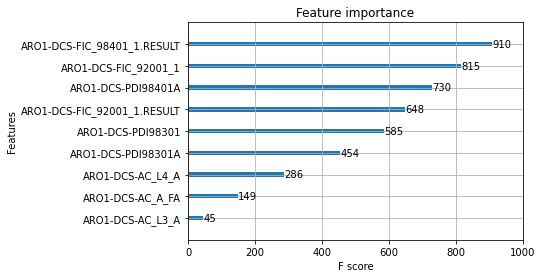

['ARO1-DCS-AC_A_FA', 'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-FIC_92001_1', 'ARO1-DCS-FIC_92001_1.RESULT', 'ARO1-DCS-FIC_98401_1.RESULT', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-PDI98301', 'ARO1-DCS-PDI98401A'] : ARO1-DCS-AC_L3_A


'ARO1-DCS-AC_L3_A 驗證分數:'

0.9992064060501742

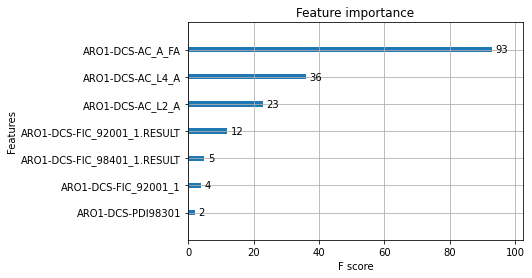

['ARO1-DCS-AC_L3_A', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_A_FA', 'ARO1-DCS-PDI98301', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-PDI98401A', 'ARO1-DCS-FIC_98401_1.RESULT', 'ARO1-DCS-FIC_92001_1', 'ARO1-DCS-FIC_92001_1.RESULT'] : ARO1-DCS-AC_L4_A


'ARO1-DCS-AC_L4_A 驗證分數:'

0.998767834478179

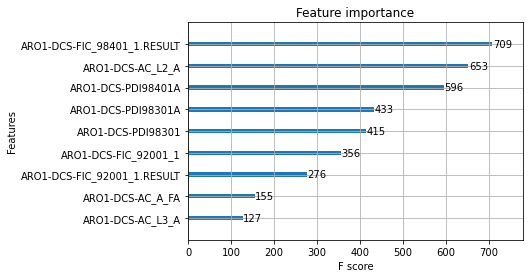

In [12]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

for L in [L2,L3,L4]:
    y_label = L[0]
    features = a.corr().abs()[L].sort_values(by=L[0],ascending=False).head(10).index.tolist()[1:]
    print(features,':',y_label)
    for i in a.columns:
        a[i] = pd.to_numeric(a[i],errors='coerce') 
    a = a[features+[y_label]].dropna(axis=0)

    X = a[features]
    y = a[y_label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()
    model.fit(X_train,y_train)
    display(f'{L[0]} 驗證分數:',model.score(X_test,y_test))
    plot_importance(model)
    plt.show()
